# Kaggle Titanic Challenge

Données obtenues à l'adresse suivante : <br/>https://www.kaggle.com/c/titanic-gettingStarted

In [381]:
#Import de Pandas
import pandas as pd
from pandas import Series, DataFrame

In [382]:
#Récupération des données du fichier train dans un DataFrame
titanic_df = pd.read_csv('train.csv')

In [383]:
#Prévisualisons nos données
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Questions d'ordre général**<br/>
<br/>
*Qui sont les passagers du Titanic ? <br/>
Comment sont répartis les classes de passager sur les différents decks ?<br/>
D'où viennet les passagers ?<br/>
Qui est venu seul ? Qui est venu en famille ?<br/>*
<br/>
**Problématique <br/>**
<br/>
Quels facteurs influent sur la survie des passagers :<br/>
1. Est ce que le le deck a une influence sur le taux de survie ? <br/>
2. Est ce qu'avoir une famille augmente son taux de survie ?

## I - Analyse des données issues de train

In [384]:
#Import de numpy (array) et seaborn/matplotlib (datavisualisation)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Permet de visualiser dans python les graphiques
%matplotlib inline

### A. Analyse par genre

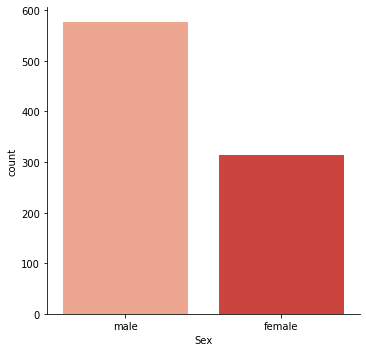

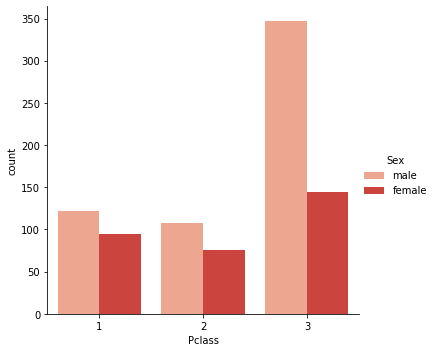

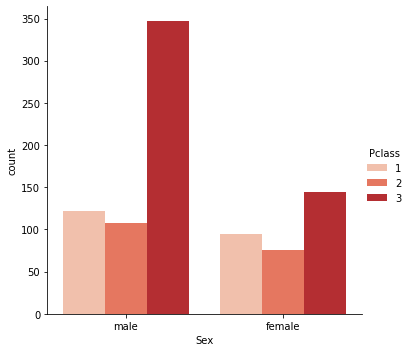

In [385]:
#Première analyse Homme/Femme
sns.catplot('Sex',data=titanic_df, kind = 'count', palette = 'Reds')
sns.catplot('Pclass',data=titanic_df, kind = 'count', hue='Sex', palette = 'Reds')
sns.catplot('Sex',data=titanic_df, kind = 'count', hue='Pclass', palette = 'Reds')

Il y a plus d'hommes que de femmes sur le bateau, les hommes sont principalement présents en troisième classe.

Cette analyse ne nous permet pas de séparer les enfants des adultes, nous allons ajouter cette information au DF.

In [386]:
#Fonction pour séparer les hommes, des femmes, des enfants
def homme_femme_enfant(passager):
    #Récupère les informations : Age et Sex
    age, sex = passager
    #Si l'âge est inférieur à 16 alors c'est un enfant, sinon afficher Homme ou Femme
    if age < 16:
        return 'child'
    else:
        return sex

In [387]:
#Ajout d'une nouvelle colonne Person qui applique la fonction définit ci-dessus
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(homme_femme_enfant, axis=1)

In [388]:
#Identique à .head(10)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


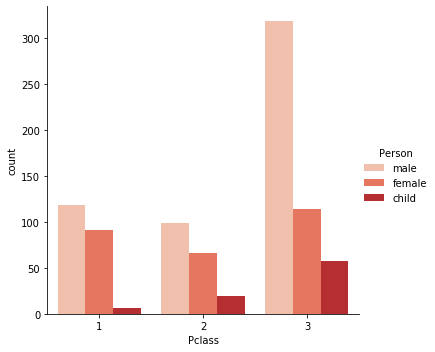

In [389]:
#Nouvelle analyse non pas par sexe mais par notre nouvelle colonne
sns.catplot('Pclass', data=titanic_df, kind='count', hue='Person', palette = 'Reds')

In [390]:
#Répartition Homme/Femme/Enfant
titanic_df.Person.value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

Il y a 537 hommes, 271 femmes et 83 enfants à bord. <br/>
<br/>
Les enfants sont principalement en troisième classe, très peu dans les premières et secondes classes.

### B. Analyse par Age

L'age moyen est de 29 ans.


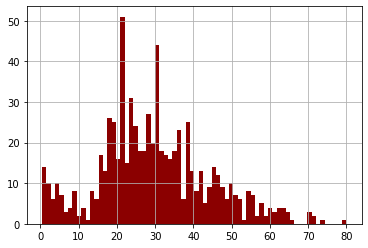

In [391]:
#Analyse de l'age des passagers
titanic_df.Age.hist(bins=70, color = 'darkred')
print("L'age moyen est de", int(titanic_df.Age.mean()), "ans.")

L'age moyen est de 29 ans. Les passagers sont principalement incluent dans la tranche d'âge 15 - 40 ans. On remarque que les enfants sont globalement en bas âge.

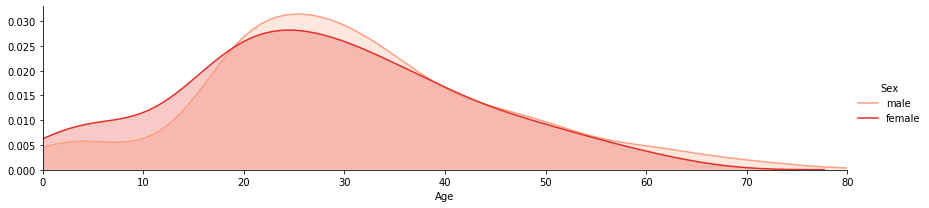

In [392]:
#FacetGrid permet de faire des graphiques multiples : nous avons définit la source, la teinte (nouvelles dimensions dans le graphique), la palette de couleur et l'aspect pour facilité la lisibilité
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4, palette = 'Reds')
#.map() permet de chosir le type de graphique voulu (kernel en l'occurence - histogramme lissé par une approche statistique) en fonction des dimensions définis dans le FacetGrid
fig.map(sns.kdeplot, 'Age', shade=True)

#Définition de l'age maximal pour normer le graphique
Agemax = titanic_df.Age.max()

#L'approche statistique va générer des tendances qui peuvent être négative ce dont nous ne voulons pas dans notre analyse donc il convient de borner l'axe x entre 0 et l'age maximal
fig.set(xlim=(0,Agemax))
#Ajout d'une légende
fig.add_legend()

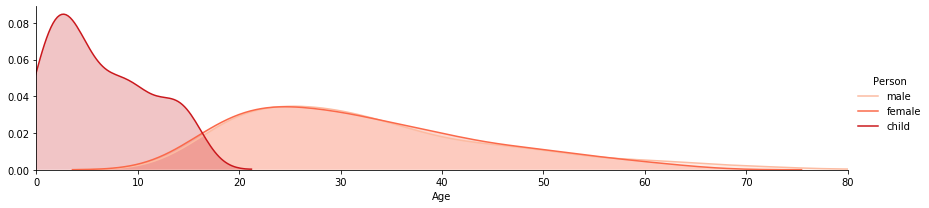

In [393]:
#Même analyse avec la colonne Person que nous avons créé
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4, palette = 'Reds')
fig.map(sns.kdeplot, 'Age', shade=True)

Agemax = titanic_df.Age.max()

#La borne ne peut s'appliquer à chaque graphique indépendamment ce qui explique l'age des enfant qui va jusqu'à plus de 20 ans (la règle initiale étant moins de 16 ans)
fig.set(xlim=(0,Agemax))
fig.add_legend()

Globalement la répartition de l'age chez les hommes et la même que chez les femmes.

### C. Analyse par Classe

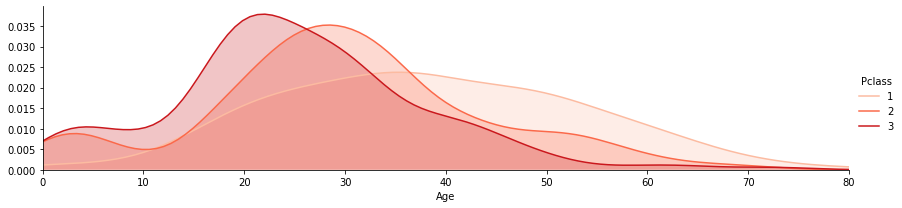

In [394]:
#Effectuons cette analyse par Classe
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4, palette = 'Reds')
fig.map(sns.kdeplot, 'Age', shade=True)

Agemax = titanic_df.Age.max()

fig.set(xlim=(0,Agemax))
fig.add_legend()

Les passagers les plus âgées sont plus souvent en première classe alors que les plus jeunes sont plutot en seconde et troisème classes.

### D. Analyse par Deck

In [395]:
#On remarque des valeurs nulles dans la colonne Cabin du DF. Il convient de les retraiter.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [396]:
#Création du nouvel objet (Serie) deck après suppression des NaN
deck = titanic_df['Cabin'].dropna()

In [397]:
#Nous n'avons besoin que du première caractère de ces chaines
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

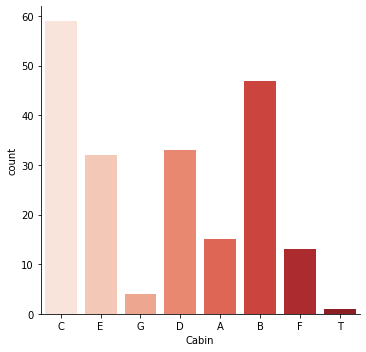

In [398]:
#Création d'une liste vide
levels = []

#Boucle pour aller chercher le premier index de chaque chaine
for level in deck:
    levels.append(level[0])
    
#On convertit la liste en Dataframe et on renomme l'unique colonne en Cabin
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

#Histogramme sur la colonne Cabin
sns.catplot('Cabin', data=cabin_df, kind='count', palette = 'Reds')

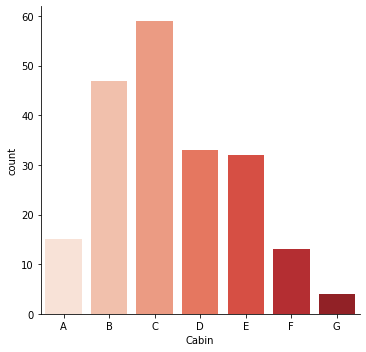

In [399]:
#Il convient de supprimer les valeurs T qui ne correspondent pas à un deck
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin', data=cabin_df, kind='count', palette = 'Reds', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Nous avons maintenant la répartition des personnes par Deck (sur la base des valeurs en notre possession net des valeurs nulles).

### E. Analyse par Embarquement

In [400]:
#Il existe 3 lieux d'embarquement : C pour Cherbourg, Q pour Queenstown et S pour Southhampton.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


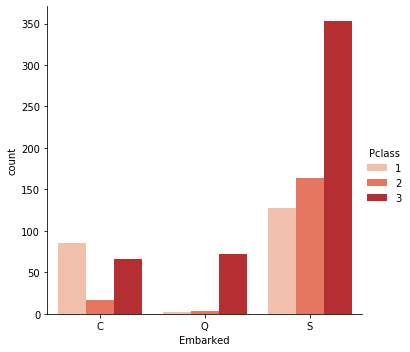

In [401]:
#Analyse des classes par lieux d'embarquement
sns.catplot('Embarked', data=titanic_df, kind='count', hue='Pclass', order=['C', 'Q', 'S'], palette = 'Reds')

Une grand proportion des prtemière classes vient de Cherbourg. La majorité des troisèmes classes vient de Southhampton.

### F. Analyse par Famille

In [402]:
#Ajout d'une nouvelle colonne Alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.Alone

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [403]:
#Les personnes seuls ont la valeur 0 en colonne Alone et plus que 0 s'ils ont un membre de leur famille sur place. Pour faciliter la lecture, nous allons remplacer ces valeurs par une information plus compréhensible.
titanic_df.Alone.loc[titanic_df.Alone > 0] = 'With Family'
titanic_df.Alone.loc[titanic_df.Alone == 0] = 'Alone'
titanic_df.head()

C:\Users\Thaad\anaconda3bis\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


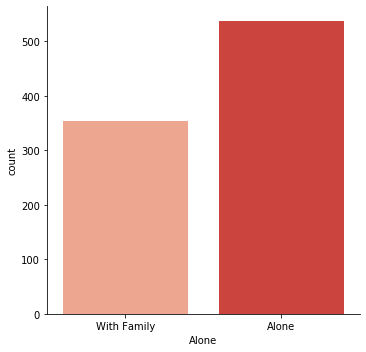

In [404]:
#Visualisons notre nouvelle colonne
sns.catplot('Alone', data=titanic_df, kind = 'count', palette = 'Reds')

Une majorité de personne est venu seul sur le bateau.

## II - Réponse à notre problématique

In [405]:
#1 correspond à un passager qui a survecu et 0 à un passager qui est mort
titanic_df['Survivor'] = titanic_df.Survived.map({0 : 'No', 1 : 'Yes'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


### A. Taux de survie en fonction du genre

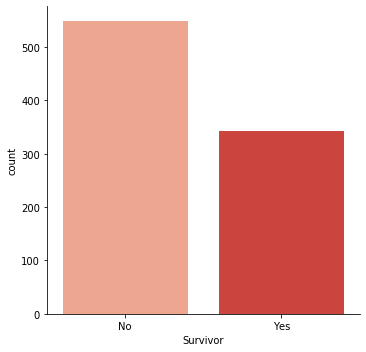

In [406]:
#Visualisons le nombre de personne ayant survecu
sns.catplot('Survivor', data = titanic_df, kind = 'count', palette = 'Reds')

La majorité des personnes sur le navire sont décédés.

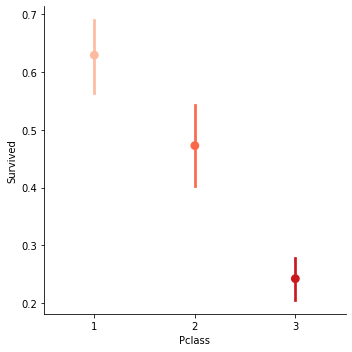

In [407]:
#Effectuons cette même analyse par Classe
sns.catplot(x='Pclass',y='Survived',kind = 'point', data = titanic_df, palette = 'Reds')

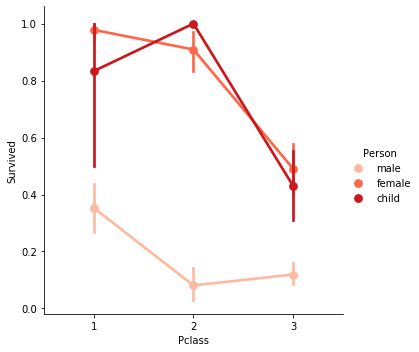

In [408]:
#Ajoutons une dimension relative au genre des passagers
sns.catplot(x='Pclass',y='Survived',kind = 'point', data = titanic_df,hue = 'Person', palette = 'Reds')

Les personnes en première classe ont plus souvent survecus que ceux en troisième classe. <br/>
Les femmes et les enfants ont plus souvent survecus que les hommes.

### B. Taux de survie en fonction de l'age

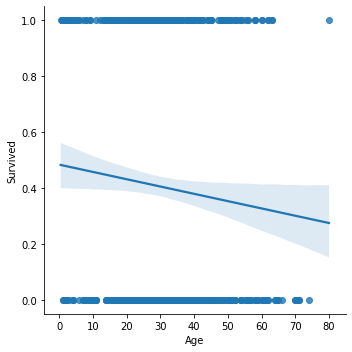

In [409]:
#Analyse de l'age des passagers qui ont survecus
plot = sns.lmplot('Age', 'Survived', data=titanic_df)

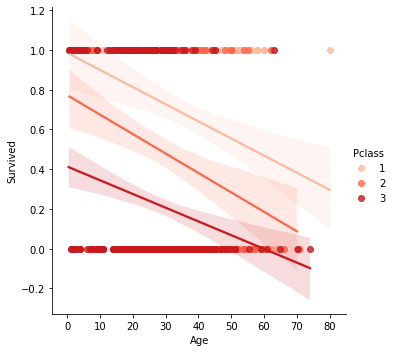

In [410]:
#Ajout de la dimension Classe à notre analyse
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='Reds')

Sans surprise, les premières classes ont un meilleur taux de survie que les troisièmes classes (cohérent avec notre analyse précédente).<br/>
Les plus jeunes ont plus souvent suvécu que les plus âgées.

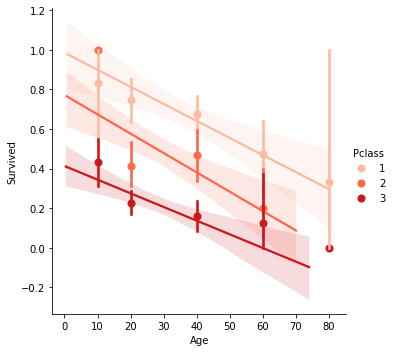

In [411]:
#Pour faciliter la lecture du graphique, nous avons définit des tranches d'âge par génération
generations = [10,20,40,60,80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='Reds', x_bins=generations)

Nous constatons une forte variance pour les personnes les plus âgées de la première classe. Certaines catégories au sein des plus âgées de cette classe ont plus souvent survécu que les autres.

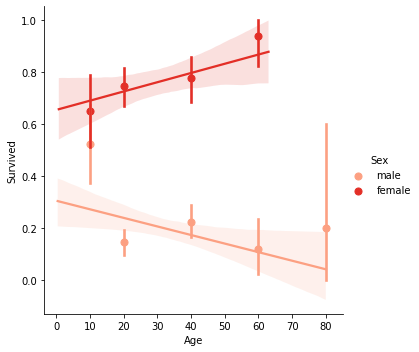

In [412]:
#Même analyse par sexe 
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='Reds', x_bins=generations)

Nous notons que les hommes âgées auraient tendance à mioeux survivre en fonction d'un autre critère. Les hommes âgées de première classe auraient plus souvent survécu que les autres.

### C. Taux de survie en fonction du deck

In [413]:
#On crée un copie du DF pour ne travailler qu'avec les lignes non nulles de la colonne Cabin
titanic_df_bis = titanic_df.copy()

In [414]:
#Supression des valeurs nulles
titanic_df_bis.dropna(inplace=True)
titanic_df_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
 12  Person       183 non-null    object 
 13  Alone        183 non-null    object 
 14  Survivor     183 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ KB


In [415]:
#On ne récupère que le premier index de chaque ligne dans la colonne Cabin et on supprime la valeur T.
titanic_df_bis['Deck'] = titanic_df_bis.Cabin.str[:1]
titanic_df_bis = titanic_df_bis[titanic_df_bis["Deck"] != 'T']
titanic_df_bis.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,Yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,Yes,C


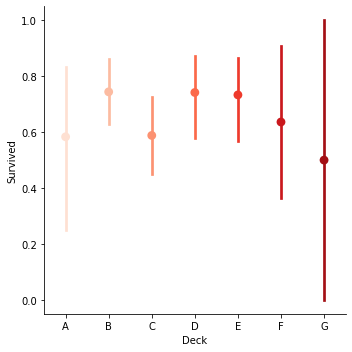

In [416]:
#Analyse du taux de survie par Deck
sns.catplot(x='Deck',y='Survived',kind = 'point', data = titanic_df_bis, palette = 'Reds', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Le taux de survit par deck est assez stable.

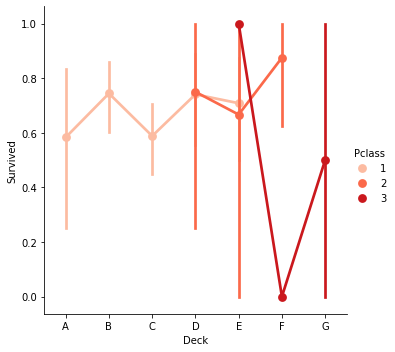

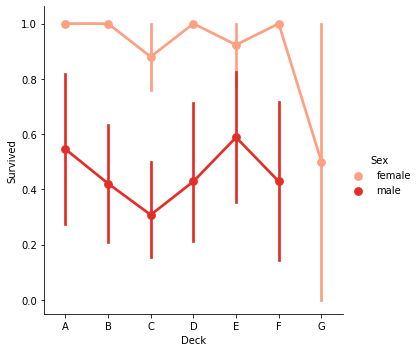

In [417]:
#Nous affinons notre analyse par CLasse et genre
sns.catplot(x='Deck',y='Survived',kind = 'point', hue = 'Pclass', data = titanic_df_bis, palette = 'Reds', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
sns.catplot(x='Deck',y='Survived',kind = 'point', hue = 'Sex', data = titanic_df_bis, palette = 'Reds', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Nous notons que la première classe était constitué des deck A à E, la seconde des decks D à F et la troisième des decks E à G. <br/>
Le taux de survit est plus élevé sur les deck A à E car ils étainet composé de la première et seconde classe principalement. <br/>
Il n'y avait que des femmes dans le Deck G qui a gloablement moins bien survecus que les autres decks (les femmes affichants un meileur taux de survie). <br/>
<br/>
*Rappel : cette analyse a été effectué sur une population de moins de 200 personnes car nous n'avions pas toutes les données.*

### D. Taux de survie en fonction de la situation familiale

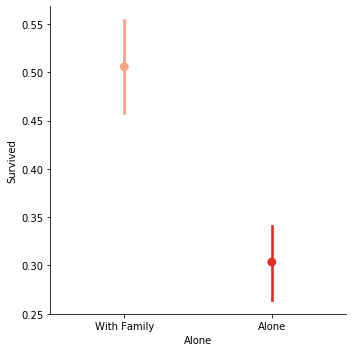

In [418]:
#Analyse du taux de survie en fonction de la situation familale
sns.catplot(x='Alone',y='Survived',kind = 'point', data = titanic_df, palette = 'Reds')

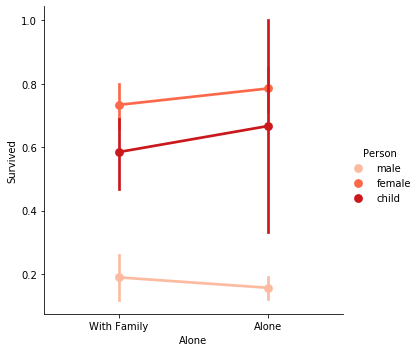

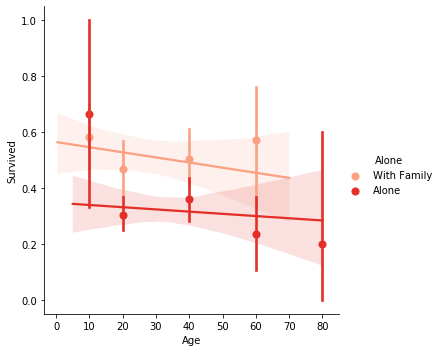

In [419]:
#Ajout du genre et l'age dans l'analyse
sns.catplot(x='Alone',y='Survived',hue = "Person", kind = 'point', data = titanic_df, palette = 'Reds')
sns.lmplot('Age', 'Survived', hue='Alone', data=titanic_df, palette='Reds', x_bins=generations)

Les personnes ayant une famille ont plus souvent survécu que les personnes seules. Il convient de noter que ce sont principalement les femmes et enfants qui sont concernés. Notons également que les femmes et enfants sans famille ont été sauvé sans tenir compte de ce critère.